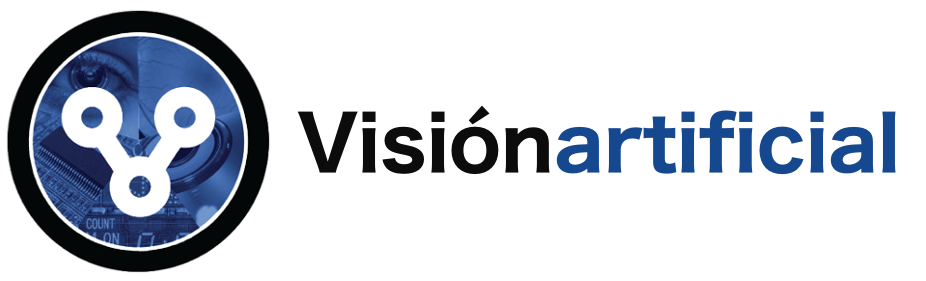

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos Harris</font>

O detector de puntos clave **Harris** foi introducido en 1988 por Harris e Stephens no seu paper, [A Combined Corner and Edge Detector](./artigos/harris_1988.pdf). Este algoritmo é un dos detectores de esquina máis comúns da visión por artificial. É bastante rápido (non tan rápido como o FAST), pero marca con máis precisión as esquinas.

## <font style="color:rgb(50,120,229)">Obxectivo:</font>

O obxectivo é revisar o popular algoritmo de Harris para a detección de esquinas.


## <font style="color:rgb(50,120,229)">Como funciona o detector de puntos clave de Harris?</font>

O detector de Harris está enraizado na álxebra lineal; con todo, a forma máis intuitiva de entender o detector é botar unha ollada á seguinte figura:
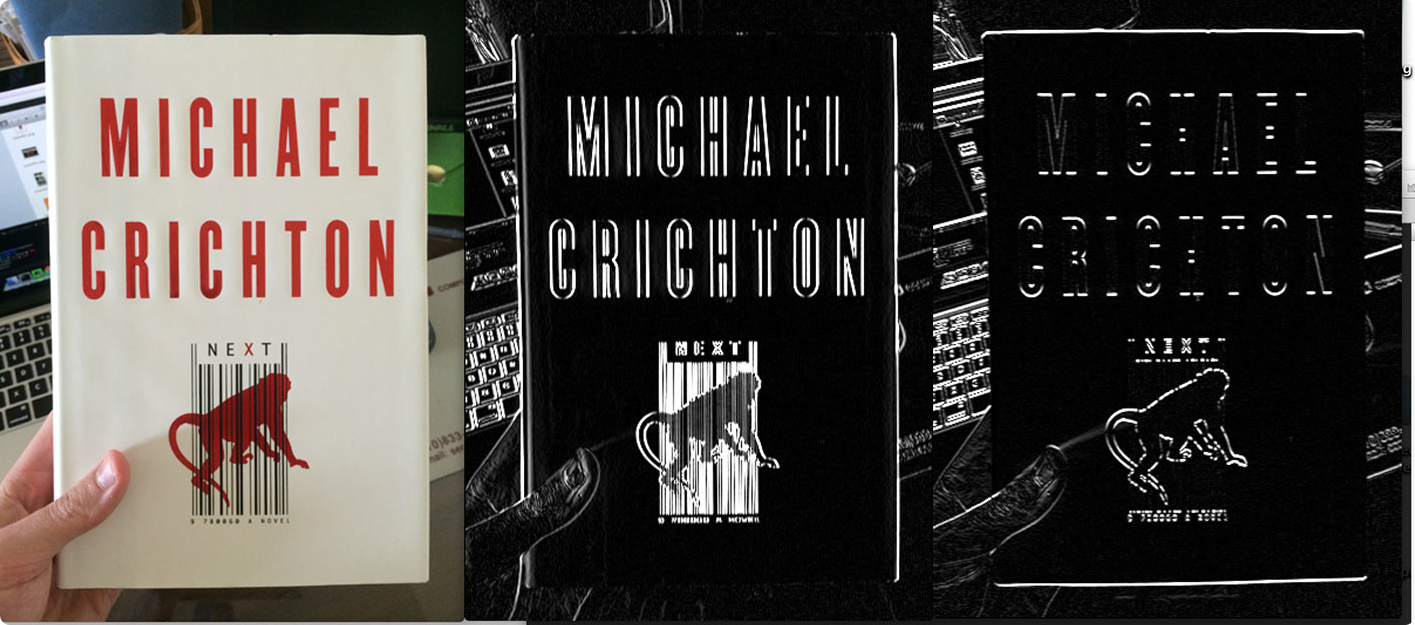
Figura 1: (esquerda) A imaxe orixinal. (Centro) Gradientes de Sobel ao longo do eixo x. (Dereita) Gradientes de Sobel para o eixo y. O noso obxectivo é tomar estas representacións de gradiente e empregalas para atopar rexións de esquinais repetibles na imaxe de entrada.


Á esquerda, temos a imaxe orixinal na que queremos detectar os puntos clave. A imaxe central representa a magnitude do gradiente na dirección x. Finalmente, a imaxe da dereita representa a magnitude do gradiente na dirección y.

O noso obxectivo aquí é utilizar estas magnitudes do gradiente para atopar e detectar cantos nas imaxes.

Entón, como o imos facer?

Para responder a esta pregunta, vexamos un exemplo sinxelo:

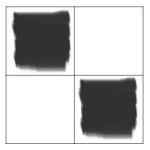

Figura 2: un exemplo de rexión dunha imaxe.

Aquí temos unha rexión simple 2 x 2. Os píxeles superior esquerda e inferior dereita son negros e os superior dereita e inferior esquerda son brancos. 


No centro destes píxeles, temos así unha esquina (marcada cun círculo vermello):
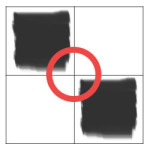
Figura 2: a rexión central desta imaxe, marcada como un círculo, é un exemplo de rexión "esquina".

Entón, como podemos definir algorítmicamente esta rexión como unha esquina?

Sinxelo! Simplemente tomaremos a suma dos valores de gradiente na rexión tanto na dirección x como na dirección respectivamente:

$\sum(G_ {x})^{2}$ e $\sum(G_ {y})^{2}$

Figura 2: a rexión central desta imaxe, marcada como un círculo, é un exemplo de rexión "esquina".


Entón, como podemos definir algorítmicamente esta rexión como unha esquina?

Sinxelo! Simplemente tomaremos a suma dos valores de gradiente na rexión tanto na dirección x como na dirección respectivamente:

$\sum(G_ {x})^{2}$ e $\sum(G_ {y})^{2}$

Se estes dous valores son suficientemente "grandes", entón podemos definir a rexión como unha esquina. Este proceso faise para cada píxel da imaxe de entrada. Este método funciona porque a rexión pechada dentro do círculo vermello terá un gran número de gradientes tanto horizontais como verticais e, cando isto ocorre, sabemos que atopamos nunha esquina.

Para estender este método a esquinas arbitrarias, primeiro necesitamos: (1) calcular a representación da magnitude do gradiente dunha imaxe e (2) despois usar estas representacións de magnitude do gradiente para construír unha matriz M:

$$M = \begin{bmatrix} \sum G_ {x}^{2} & \sum G_{x} G_{y} \\ \sum G_{x} G_{y} & \sum G_{y}^{2 } \end{bmatrix}$$

Agora que M está definido, podemos tomar a descomposición do valor propio da matriz, dándonos unha "puntuación" que  cuantifica e puntua a cantidade de "esquina" na rexión:
$R = \det(M) - k(\mathrm{Tr}(M))^{2}$

onde $\det(M) = \lambda_ {1} \lambda_ {2}, \mathrm{Tr}(M) = \lambda_ {1} + \lambda_ {2}$ e ambos $\lambda_{1} e \lambda_{2}$ son os valores propios da matriz M. Unha vez máis, este proceso faise para todos e cada un dos píxeles da imaxe de entrada.

Entón, agora que temos estes autovalores, como podemos "saber" se unha rexión é realmente unha esquina ou non?

Ben, segundo os autores, podemos usar a seguinte lista de posibles valores para axudarnos a determinar se unha rexión é ou non un punto clave:

- Se $|R|$ é pequeno, entón estamos examinando unha rexión "plana" da imaxe. Non é un punto clave.
- Se $R <0$, que ocorre cando $\lambda_ {1} >> \lambda_ {2}$ ou $\lambda_{2} >> \lambda_{1}$, a rexión é un "borde". Unha vez máis, non temos un punto clave.
- A única vez que a rexión pode considerarse un punto clave é cando ambas $| R |$ é grande, o que corresponde a $\lambda_{1}$ e cando $\lambda_{2}$ é aproximadamente igual. Se isto se mantén, entón a rexión é realmente un punto clave.

O seguinte gráfico axudará a representar esta idea:

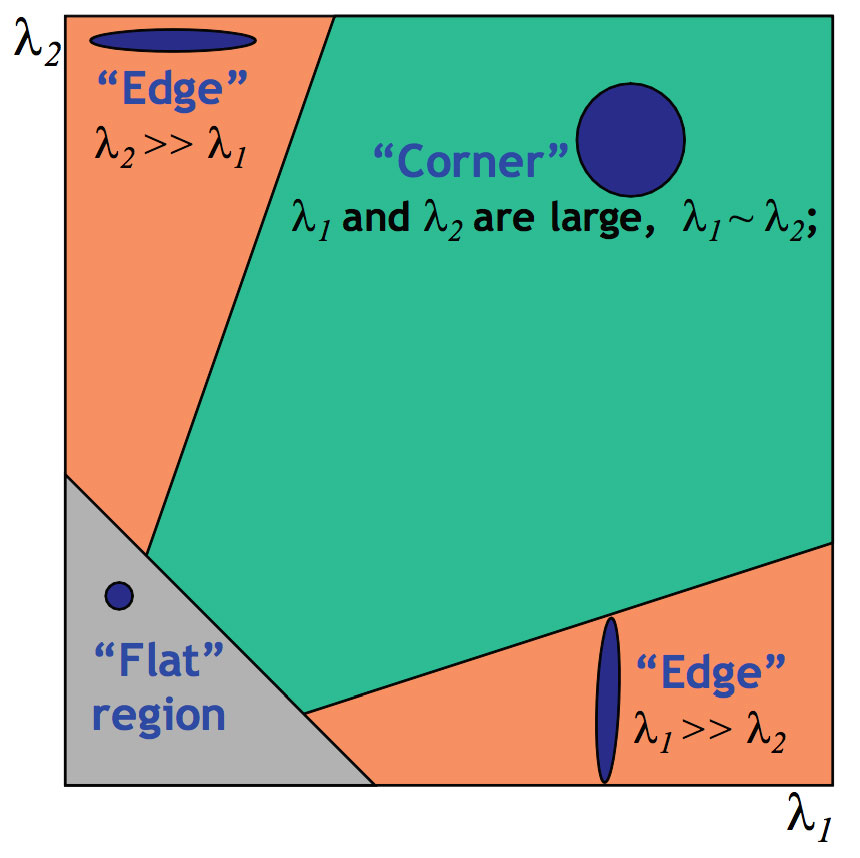
Figura 4: representación da partición en función dos autovalores.


Vexamos un exemplo:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
def harris(gray, blockSize=2, apetureSize=3, k=0.1, T=0.02):
	# convertimos a imaxe de entrada a punto flotante e
	# logo achamos a matriz de Harris
	gray = np.float32(gray)
	H = cv2.cornerHarris(gray, blockSize, apetureSize, k)

	# recuperamos as coordenadas (x, y) onde o valor de Harris e superior a un
	# limiar (punto clave), considerando un entorno de radio 3
	kps = np.argwhere(H > T * H.max())
	kps = [cv2.KeyPoint(pt[1], pt[0], 3) for pt in kps]

	# Devolvemos os puntos clave detectados
	return kps

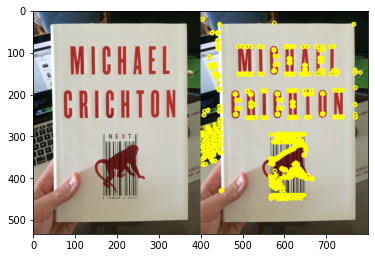

In [33]:
# cargamos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
if image is None:
	print("imaxe non atopada")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# A funcion cornerHarris require un array de tipo float32
gray = np.float32(gray)

# Detector de Harris
harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)
#obtemos as coordenadas das esquinas e pintamos un pixel ou un circulo
#un pixel soamente en cor verde
#image[harris_corners > 0.025 * harris_corners.max() ] = [255, 0, 0]
#pintamos un circulo amarelo de radio 4
r,c = np.where(harris_corners > 0.025 * harris_corners.max())
for point in zip(c,r):
    cv2.circle(image,point, 4, (0, 255, 255), 2)
    
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));